 **1.	Descarga el corpus “wine dataset” dentro de scikit-learn y explóralo. El conjunto de datos contiene los resultados de análisis químico de vinos cultivados en la misma región en Italia, pero derivados de tres cultivares diferentes, consta de 13 atributos y 3 tipos de vino.**

Librerias y corpus que se usara

In [18]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

wine=load_wine()

 2.	Separa las columnas de los datos en variables dependientes e independientes, es decir, atributos y etiquetas de clase. Utiliza el código siguiente para separar los datos en el conjunto de entrenamiento y de prueba.


In [51]:
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


<Axes: >

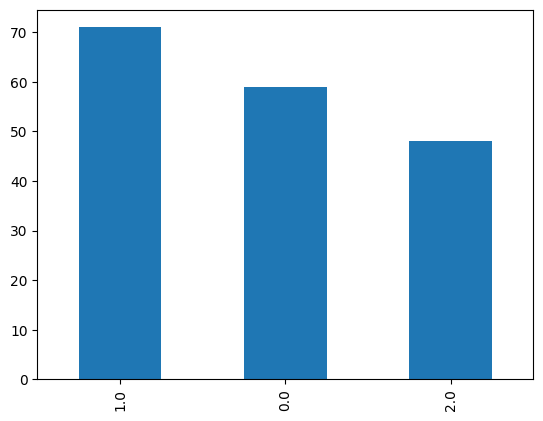

In [52]:
frecuencia=df['target'].value_counts()
frecuencia.plot(kind='bar')

In [58]:

fig = px.scatter_matrix(df,
    dimensions=['alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium','flavanoids','nonflavanoid_phenols','proanthocyanins','hue','od280/od315_of_diluted_wines','proline'],color="target")
fig.update_layout(
                  dragmode='select',
                  width=1900,
                  height=1900,
                  hovermode='closest')
fig.show()

In [21]:
X_train, X_test, y_train,y_test = train_test_split(wine.data, wine.target, test_size = 0.30, random_state=109)

In [22]:
modelo_naivebayes=GaussianNB()
modelo_naivebayes.fit(X_train,y_train)
y_pred = modelo_naivebayes.predict(X_test)
cm=np.array(confusion_matrix(y_test,y_pred))

Text(0.5, 23.52222222222222, 'Valor Predecido')

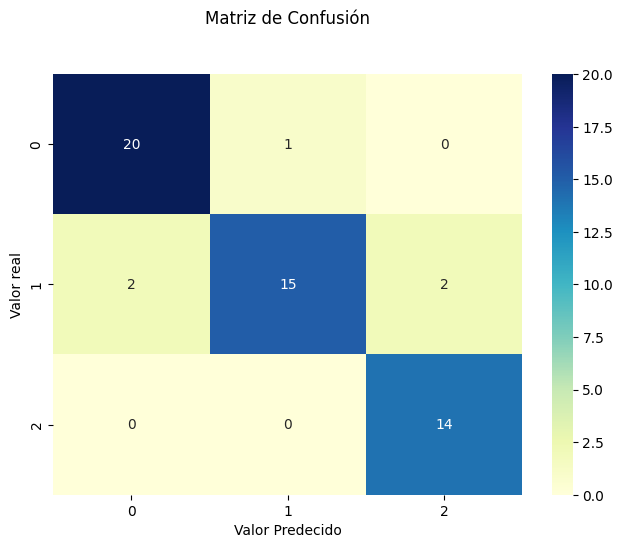

In [23]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

 **6.	Mejora los resultados de la predicción. Utiliza el apartado de supervised learning en el sitio oficial de scikit-learn en Internet para proponer mejoras al clasificador, ya sea modificando sus parámetros o utilizando algún otro.**

In [24]:
model = DecisionTreeClassifier(max_depth=5)
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
X = df.drop("label", axis=1)
Y = df.label
model.fit(X=X, y=Y)
model.score(X,Y)

1.0

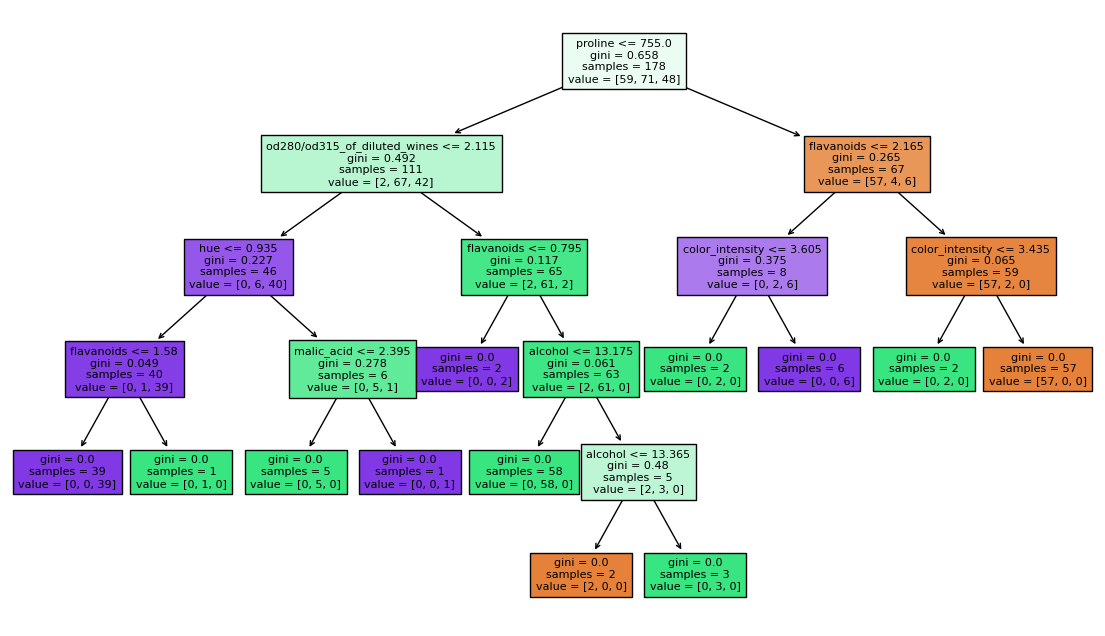

In [25]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=8);

 **7.	Utiliza la red neuronal Bert y GPT que son redes neuronales pre-entrenadas y a partir de 5 textos/oraciones revisa como predicen y complementa la información, prueba en idioma español e ingles.**

In [26]:


# Cargar el modelo pre-entrenado y el tokenizador de BERT en español
model_name = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Crear un pipeline para la clasificación de texto
text_classification_pipeline = pipeline(
    'text-classification',
    model=model,
    tokenizer=tokenizer
)

# Ejecutar la clasificación de texto en una oración en español
result = text_classification_pipeline('Esta película es muy buena, la recomiendo totalmente')
print(result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_0', 'score': 0.5406932830810547}]


In [27]:

# Descargar el modelo pre-entrenado de GPT-2 en español
model_name = "mrm8488/spanish-gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [28]:
#Cambiar este texto para 5 ejemplos
input_str = "La inteligencia artificial"

max_length = 100
# Generar texto con el modelo pre-entrenado de GPT-2 en español
input_ids = tokenizer.encode(input_str, return_tensors="pt")
sample_outputs = model.generate(
    input_ids,
    do_sample=True,
    max_length=max_length,
    top_k=50,
    top_p=0.95,
    temperature=1.0,
    num_return_sequences=1
)
generated_text = tokenizer.decode(sample_outputs[0], skip_special_tokens=True)



print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La inteligencia artificial... es algo muy complejo.No es como lo que nos sucede, pero...Si alguien lo tiene, le ocurre a la gente cercana a nosotros, a nuestros amigos, compañeros, incluso a la propia familia... y nos afecta, pero lo podemos hacer.¿Y luego?Bueno, cuando se termina, no vuelve a suceder.Y si no funciona, no hay nada que podamos hacer.Y lo que nos sucede, lo que hacemos...Es lo que no nos afecta.A la
